In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
dataset = sm.datasets.sunspots.data.load_pandas()

In [8]:
dataset.data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


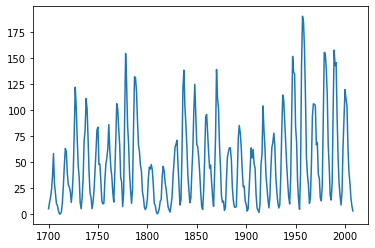

In [12]:
df = dataset.data
plt.plot(df['YEAR'], df["SUNACTIVITY"])

In [23]:
csdf = sm.datasets.china_smoking.data.load_pandas().data

In [24]:
csdf

,smoking_yes_cancer_yes,smoking_yes_cancer_no,smoking_no_cancer_yes,smoking_no_cancer_no
Location,,,,
Beijing,126,100,35,61
Shanghai,908,688,497,807
Shenyang,913,747,336,598
Nanjng,235,172,58,121
Harbin,402,308,121,215
Zhengzhou,182,156,72,98
Taiyuan,60,99,11,43
Nanchang,104,89,21,36


In [30]:
csdf.index

Index(['Beijing', 'Shanghai', 'Shenyang', 'Nanjng', 'Harbin', 'Zhengzhou',
       'Taiyuan', 'Nanchang'],
      dtype='object', name='Location')

In [35]:
list(csdf.index)

['Beijing',
 'Shanghai',
 'Shenyang',
 'Nanjng',
 'Harbin',
 'Zhengzhou',
 'Taiyuan',
 'Nanchang']

In [37]:
csdf.loc['Beijing']

smoking_yes_cancer_yes    126
smoking_yes_cancer_no     100
smoking_no_cancer_yes      35
smoking_no_cancer_no       61
Name: Beijing, dtype: int64

In [38]:
csdf.iloc[0]

smoking_yes_cancer_yes    126
smoking_yes_cancer_no     100
smoking_no_cancer_yes      35
smoking_no_cancer_no       61
Name: Beijing, dtype: int64

In [40]:
type(csdf)

pandas.core.frame.DataFrame

In [47]:
# from datetime import datetime

# dates = pd.date_range(datetime.now(), periods=8, freq='M')
# dates

In [48]:
csmat = np.asarray(csdf)
csmat

array([[126, 100,  35,  61],
       [908, 688, 497, 807],
       [913, 747, 336, 598],
       [235, 172,  58, 121],
       [402, 308, 121, 215],
       [182, 156,  72,  98],
       [ 60,  99,  11,  43],
       [104,  89,  21,  36]])

In [51]:

tables = [np.reshape(city.tolist(), (2, 2)) for city in csmat]

import pprint
pprint.pprint(tables)

[array([[126, 100],
       [ 35,  61]]),
 array([[908, 688],
       [497, 807]]),
 array([[913, 747],
       [336, 598]]),
 array([[235, 172],
       [ 58, 121]]),
 array([[402, 308],
       [121, 215]]),
 array([[182, 156],
       [ 72,  98]]),
 array([[60, 99],
       [11, 43]]),
 array([[104,  89],
       [ 21,  36]])]


## Stratified 2x2 tables

Stratification occurs when we have a collection of contingency tables defined by the same row and column factors. In the example below, we have a collection of 2x2 tables reflecting the joint distribution of smoking and lung cancer in each of several regions of China. It is possible that the tables all have a common odds ratio, even while the marginal probabilities vary among the strata. The ‘Breslow-Day’ procedure tests whether the data are consistent with a common odds ratio. It appears below as the Test of constant OR. The Mantel-Haenszel procedure tests whether this common odds ratio is equal to one. It appears below as the Test of OR=1. It is also possible to estimate the common odds and risk ratios and obtain confidence intervals for them. The summary method displays all of these results. Individual results can be obtained from the class methods and attributes.

via https://www.statsmodels.org/stable/contingency_tables.html#stratified-2x2-tables


In [54]:
st = sm.stats.StratifiedTable(tables)

In [55]:
st.summary()

,Estimate,LCB,UCB
Pooled odds,2.174,1.984,2.383
Pooled log odds,0.777,0.685,0.868
Pooled risk ratio,1.519,,
,,,
,Statistic,P-value,
Test of OR=1,280.138,0.000,
Test constant OR,5.200,0.636,
,,,
Number of tables,8,,
Min n,213,,
